In [1]:
import numpy as np

## Preprocess the iris data set

In [2]:
def preprocessIris(infile,outfile):
    stext1 = 'Iris-setosa'
    stext2 = 'Iris-versicolor'
    stext3 = 'Iris-virginica'
    rtext1 = '0'
    rtext2 = '1'
    rtext3 = '2'
    fid = open(infile,"r")
    oid = open(outfile,"w")
    for s in fid:
        if s.find(stext1)>-1:
            oid.write(s.replace(stext1, rtext1))
        elif s.find(stext2)>-1:
            oid.write(s.replace(stext2, rtext2))
        elif s.find(stext3)>-1:
            oid.write(s.replace(stext3, rtext3))
    fid.close()
    oid.close()

In [3]:
preprocessIris('iris.data','iris_proc.data')

In [4]:
iris = np.loadtxt('iris_proc.data',delimiter=',')

In [5]:
iris[:,:4] = iris[:,:4]-iris[:,:4].mean(axis=0)
imax = np.concatenate((iris.max(axis=0)*np.ones((1,5)),
                       iris.min(axis=0)*np.ones((1,5))),axis=0).max(axis=0)
iris[:,:4] = iris[:,:4]/imax[:4]

# Perform linear descriminant analysis

In [6]:
import ld_analysis as lda

In [7]:
data = iris[:,:4]
labels = iris[:,4]
classes = np.unique(labels)

In [8]:
newData = lda.ld_analysis(data,labels,2)

In [9]:
import pylab as pl
%matplotlib inline

In [10]:
#get the indces of data with label i
indices0 = np.squeeze(np.where(labels == classes[0])) 
indices1 = np.squeeze(np.where(labels == classes[1]))
indices2 = np.squeeze(np.where(labels == classes[2]))

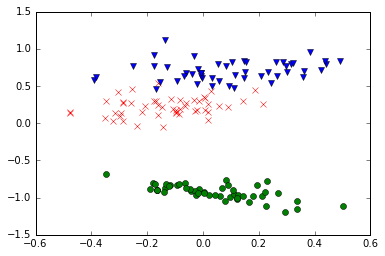

In [11]:
pl.plot(newData[indices0,0],newData[indices0,1],'go')
pl.plot(newData[indices1,0],newData[indices1,1],'rx')
pl.plot(newData[indices2,0],newData[indices2,1],'bv')

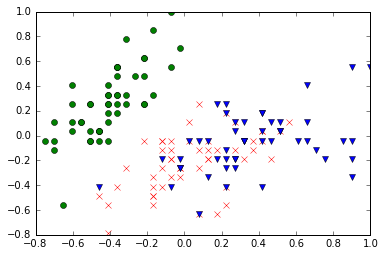

In [12]:
pl.plot(data[indices0,0],data[indices0,1],'go')
pl.plot(data[indices1,0],data[indices1,1],'rx')
pl.plot(data[indices2,0],data[indices2,1],'bv')

# Do PCA

In [13]:
import pca

In [14]:
x,y,evecs,evals = pca.pca(data,2)

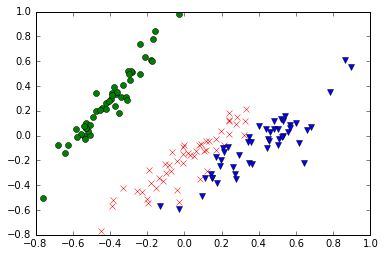

In [15]:
pl.plot(y[indices0,0],y[indices0,1],'go')
pl.plot(y[indices1,0],y[indices1,1],'rx')
pl.plot(y[indices2,0],y[indices2,1],'bv')

In [16]:
y

array([[ -3.87319672e-01,   3.43691230e-01,  -7.43994977e-01,
         -7.55276009e-01],
       [ -5.38859892e-01,  -7.73947435e-04,  -7.12506012e-01,
         -7.46161788e-01],
       [ -5.31200824e-01,   9.80349660e-02,  -7.68922639e-01,
         -7.98394939e-01],
       [ -5.56754979e-01,   1.05992936e-02,  -7.43845324e-01,
         -7.78191298e-01],
       [ -3.79854242e-01,   3.90794631e-01,  -7.65842380e-01,
         -7.74891075e-01],
       [ -1.81258983e-01,   6.12959897e-01,  -6.52694212e-01,
         -6.41018244e-01],
       [ -4.72596758e-01,   1.96060294e-01,  -7.57400328e-01,
         -7.79539392e-01],
       [ -4.20145617e-01,   2.60857669e-01,  -7.31639482e-01,
         -7.48075385e-01],
       [ -6.44222242e-01,  -1.41261496e-01,  -7.57299796e-01,
         -8.02799104e-01],
       [ -5.27891782e-01,   6.44347549e-02,  -7.41913163e-01,
         -7.72439039e-01],
       [ -2.83536255e-01,   5.11116044e-01,  -7.19433640e-01,
         -7.17959473e-01],
       [ -4.45506134e